In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
points, labels = datasets.make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, random_state=7, n_informative=2, n_redundant=0)

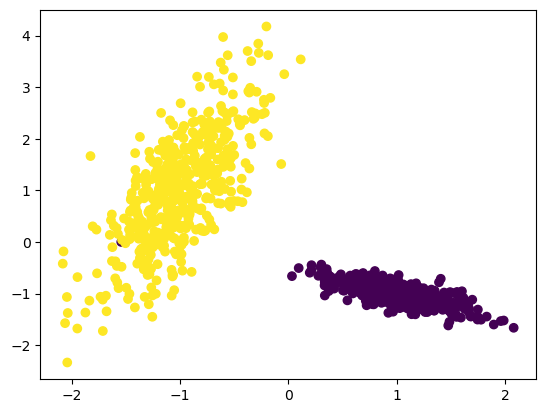

In [3]:
plt.scatter(points[:, 0], points[:, 1], c = labels)

In [4]:
datasets.make_classification?

In [5]:
print(points.shape, labels.shape)

(1000, 2) (1000,)


In [6]:
labels[labels == 0] = -1

In [7]:
class SVM:
    def __init__(self, c=0.1):
        self.c = c
        self.W = 0
        self.b = 0
        
    def hinge_loss(self, W, b, X, Y):
        
        h_loss = 0.5*(np.dot(W, W.T))
        
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(W, X[i].T) + b)
            
            h_loss += self.c*max(0, (1 - ti))
#         print(h_loss[0])
        return h_loss

    def stocastic_gradient_descent(self, X, Y, learn_rate = 0.003, epochs = 1000, batch = 20):
        
        m, n = X.shape
        W = np.zeros((1, n))
        b = 0
        loss_epoch = []
        
        for i in range(epochs):
        
            h_loss = self.hinge_loss(W, b, X, Y)
            loss_epoch.append(h_loss[0][0])
            
            for start in range(int(X.shape[0]/batch)):
                grad_w = 0
                grad_b = 0
#                 print(start)
                for j in range(start*batch, start*batch + batch):
                    ti = Y[j]*(np.dot(W, X[j].T) + b)
                    
                    if ti>=1:
                        grad_w += 0
                        grad_b += 0
                        
                    else:
                        grad_w += self.c*Y[j]*X[j]
                        grad_b += self.c*Y[j]
                        
                W = W - learn_rate*W + learn_rate*grad_w
                b = b + learn_rate*grad_b
        self.W = W
        self.b = b
        return W, b, loss_epoch

In [8]:
svm = SVM()
weights, bias, cost = svm.stocastic_gradient_descent(points, labels)

In [9]:
cost

[99.9999999999986,
 44.491248566464414,
 18.201335972895077,
 12.890377418704864,
 11.295711824504064,
 10.490094695095108,
 10.023002848919443,
 9.718832017068303,
 9.511522218991933,
 9.379514226702744,
 9.299366751774887,
 9.221049794745358,
 9.185295998691728,
 9.128815977091344,
 9.080765040500152,
 9.067692191855881,
 9.041911895739096,
 9.033278292327203,
 9.012523318298244,
 9.009586382044978,
 8.992133202389384,
 9.004259791148302,
 9.001235423026262,
 8.985196447714129,
 8.984906460246359,
 8.998468046119457,
 8.982865083320085,
 8.996706802475508,
 8.996280627600083,
 8.994416663895159,
 8.994309935005319,
 8.992720861392199,
 8.992850674873168,
 8.991465151303592,
 8.990861818703134,
 8.989763888367824,
 8.988962668381328,
 8.988133208720773,
 8.98777300982426,
 8.987112222611522,
 9.001494093412054,
 8.985455734581056,
 8.984204259977416,
 8.984050755290612,
 8.98299180355793,
 8.983010393392787,
 8.996834284484185,
 8.996390330457851,
 8.981032492697715,
 8.98132438498452

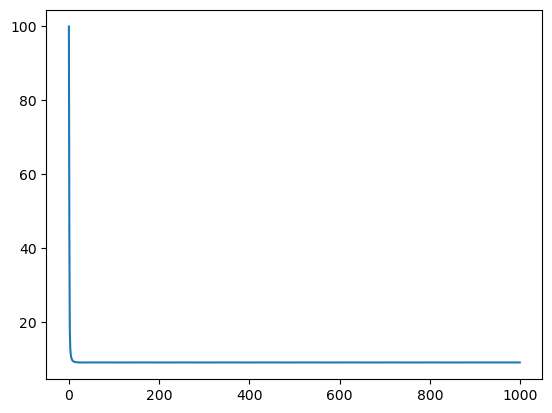

In [10]:
plt.plot(cost)

In [11]:
print(svm.hinge_loss(weights, bias, points, labels))

[[8.99039295]]


In [12]:
weights, bias

(array([[-0.68016408,  0.38836868]]), -0.0008999999999999986)

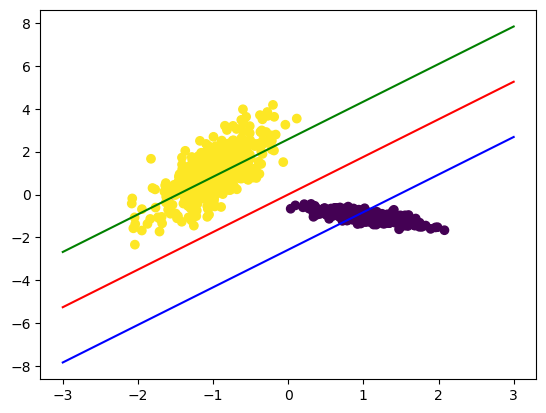

In [13]:
line = np.linspace(-3, 3, 10)
hyperplane = (-weights[0][0]*line - bias)/weights[0][1]

supp_line_pos = (-weights[0][0]*line - bias + 1)/weights[0][1]
supp_line_neg = (-weights[0][0]*line - bias - 1)/weights[0][1]

plt.plot(line, hyperplane, c = 'red')
plt.plot(line, supp_line_pos, c = 'green')
plt.plot(line, supp_line_neg, c = 'blue')
plt.scatter(points[:, 0], points[:, 1], c = labels)

In [14]:
line

array([-3.        , -2.33333333, -1.66666667, -1.        , -0.33333333,
        0.33333333,  1.        ,  1.66666667,  2.33333333,  3.        ])

In [15]:
weights

array([[-0.68016408,  0.38836868]])